# **Exploratory Data Analysis- Housing Data**

# **Basic Information**
The dataset contains 545 entries.

* There are 13 columns, which include a mix of numerical and categorical data types.

**Columns and Their Types**
* Numerical Columns: 'price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking'
* Categorical Columns: 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus'

In [1]:
import pandas as pd

# Define the path to the file
file_path = '/content/Housing.csv'

# Load the data into a DataFrame
housing_data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
housing_data.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# **Descriptive Statistics**
* Price: Ranges from 1,750,000 to 13,300,000 with an average of around 4,766,729.
* Area: Varies from 1,650 to 16,200 square feet, averaging at 5,150.54 square feet.
* Bedrooms: Mostly 2 to 3 bedrooms, with a maximum of 6.
* Bathrooms: Mostly 1 to 2 bathrooms.
* Stories: Generally 1 to 2 stories.
* Parking: Varies from 0 to 3 parking spaces, with an average of less than 1 parking space per house.

In [2]:
# Perform an initial exploratory data analysis to understand the dataset better

# Basic information about the dataset
basic_info = housing_data.info()

# Descriptive statistics for the numerical columns
descriptive_stats = housing_data.describe()

# Checking for missing values
missing_values = housing_data.isnull().sum()

# Checking the distribution of categorical variables
categorical_columns = housing_data.select_dtypes(include=['object']).columns
categorical_distribution = housing_data[categorical_columns].apply(pd.Series.value_counts)

basic_info, descriptive_stats, missing_values, categorical_distribution


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


(None,
               price          area    bedrooms   bathrooms     stories  \
 count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
 mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
 std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
 min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
 25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
 50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
 75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
 max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   
 
           parking  
 count  545.000000  
 mean     0.693578  
 std      0.861586  
 min      0.000000  
 25%      0.000000  
 50%      0.000000  
 75%      1.000000  
 max      3.000000  ,
 price               0
 area                0
 bedrooms            0
 bathrooms           0
 stories             0
 mainroad           

# **Categorical Data Distribution**
* Mainroad: Majority (468) have main road access, while 77 do not.
* Guestroom: Most (448) houses do not have a guestroom; only 97 houses have one.
* Basement: A significant number (354) lack a basement, whereas 191 houses have a basement.
* Hotwater Heating: Rare, with only 25 houses equipped and 520 without.
* Air Conditioning: More common, with 172 houses having air conditioning and 373 without.
* Preferred Area (Prefarea): 417 houses are not in the preferred area, whereas 128 are.
* Furnishing Status: Distributed among furnished (140), semi-furnished (227), and unfurnished (178).


<ipython-input-3-60a03ba62990>:33: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(housing_data.corr(), annot=True, cmap='coolwarm')


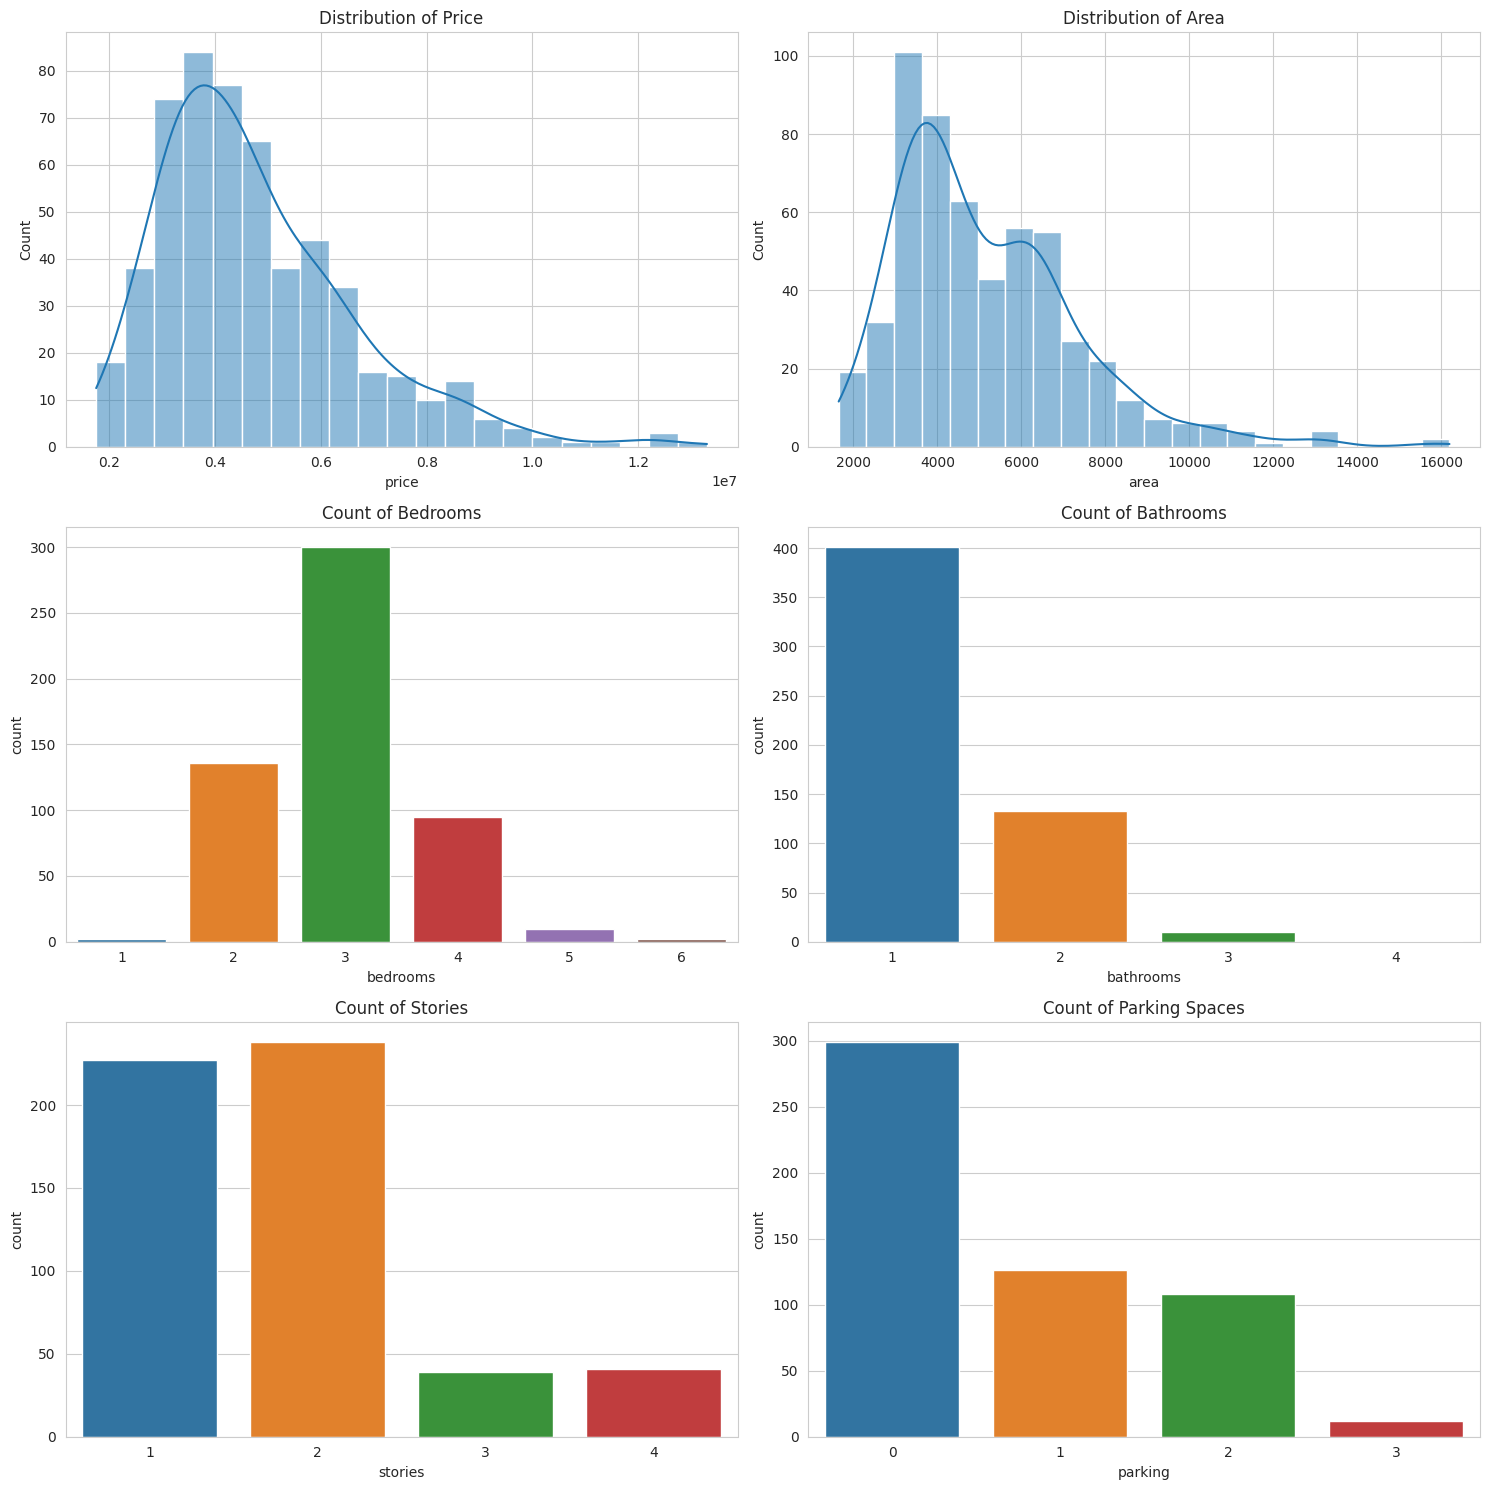

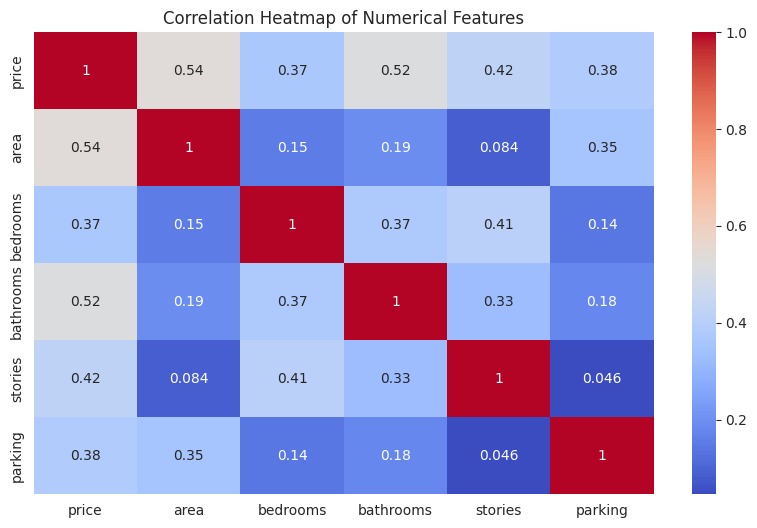

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Prepare for multiple plots
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Distribution of numerical features
sns.histplot(housing_data['price'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Price')

sns.histplot(housing_data['area'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Area')

sns.countplot(x='bedrooms', data=housing_data, ax=axes[1, 0])
axes[1, 0].set_title('Count of Bedrooms')

sns.countplot(x='bathrooms', data=housing_data, ax=axes[1, 1])
axes[1, 1].set_title('Count of Bathrooms')

sns.countplot(x='stories', data=housing_data, ax=axes[2, 0])
axes[2, 0].set_title('Count of Stories')

sns.countplot(x='parking', data=housing_data, ax=axes[2, 1])
axes[2, 1].set_title('Count of Parking Spaces')

plt.tight_layout()

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(housing_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')

plt.show()


# **Distributions of Numerical Features**
* Price: The distribution is right-skewed, indicating a concentration of houses in the lower price range, with fewer houses in the higher price bracket.
* Area: Similar to the price, the area distribution is also right-skewed, suggesting that most houses have a smaller area.
* Bedrooms: The majority of houses have 2 or 3 bedrooms.
* Bathrooms: Most houses have either 1 or 2 bathrooms.
* Stories: A significant number of houses are either 1 or 2 stories.
* Parking: Many houses do not have a parking space, followed by a significant number with 1 parking space.

**Correlation Heatmap**
* There is a moderate to strong positive correlation between the price of the house and features like area, bathrooms, and parking. This implies that as these features increase, the price of the house also tends to increase.
* Bedrooms and stories show a weaker positive correlation with price.
* There are also some correlations among the independent variables, such as between area and parking, indicating that larger houses tend to have more parking space.

These visualizations and the correlation heatmap are essential for understanding the relationships between different features in the dataset, which can be useful for predictive modeling or real estate market analysis. ​​

<ipython-input-4-e9bfe76dde78>:7: UserWarning: Ignoring `ax`; jointplot is a figure-level function.
  sns.jointplot(x='area', y='price', data=housing_data, kind="reg", ax=axes[0, 0])


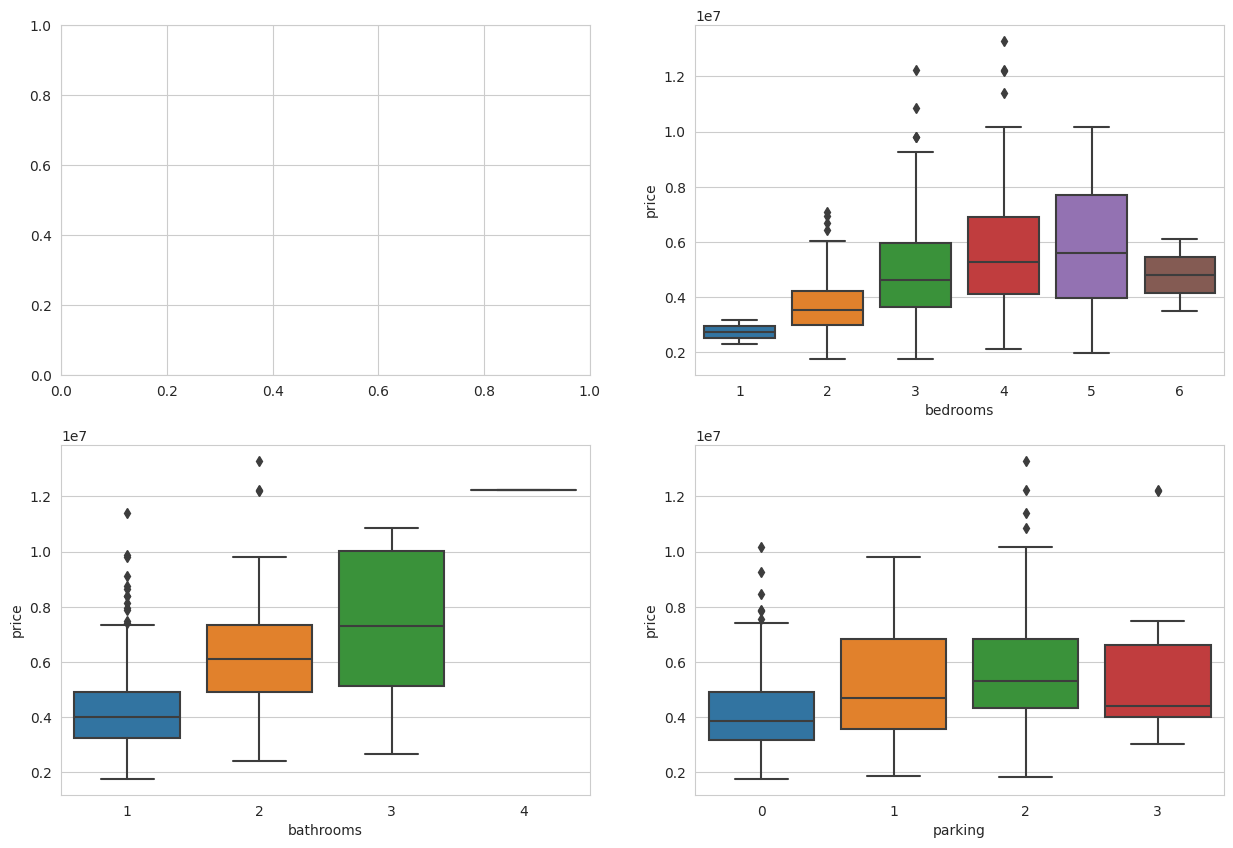

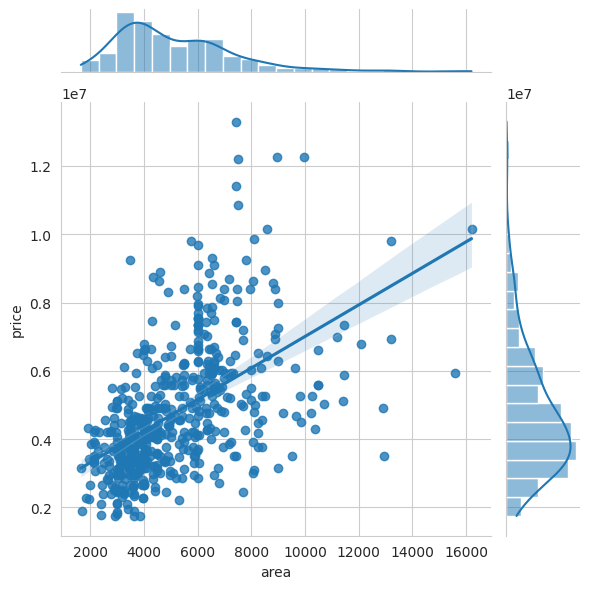

In [4]:
# Plotting relationships between house features and price using different types of plots for better visibility

# Prepare for multiple plots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Relationship between Area and Price using a joint plot
sns.jointplot(x='area', y='price', data=housing_data, kind="reg", ax=axes[0, 0])

# Relationship between Number of Bedrooms and Price using boxplot
sns.boxplot(x='bedrooms', y='price', data=housing_data, ax=axes[0, 1])

# Relationship between Number of Bathrooms and Price using boxplot
sns.boxplot(x='bathrooms', y='price', data=housing_data, ax=axes[1, 0])

# Relationship between Number of Parking Spaces and Price using boxplot
sns.boxplot(x='parking', y='price', data=housing_data, ax=axes[1, 1])

plt.tight_layout()
plt.show()


**Visualizations offer clearer insights into the relationships between various house features and their prices:**

* **Area vs Price (Joint Plot)**: This plot combines a scatter plot with distribution plots for both variables. It reinforces the positive linear relationship between the area of the house and its price, showing a clear trend of increasing price with larger areas.
* **Bedrooms vs Price (Boxplot)**: The boxplot for each bedroom category provides a better view of the price distribution within each category. It shows that the median price generally increases with more bedrooms, but also highlights the variability in prices within each category.
* **Bathrooms vs Price (Boxplot)**: Similar to the bedrooms, this plot reveals that the median price tends to increase with the number of bathrooms. The spread of prices is also visible, showing the range within each bathroom category.
* **Parking vs Price (Boxplot)**: This plot illustrates the median and range of prices across different numbers of parking spaces. Again, a general trend of increasing prices with more parking spaces is visible, along with the variability in prices for each category.

These boxplots provide a more nuanced view of how house features relate to prices, emphasizing not only the general trends but also the variations and outliers within each category. This can be particularly useful for understanding the diversity of the housing market and making more informed decisions based on these features